In [1]:
from itertools import permutations
from matplotlib import pyplot as plt

from StringSuperPermutation import StringSuperPerm_GA

In [2]:
chars = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

SUPERPERM_CHARS = 5

POP_SIZE = 10_000
MUTATION_RATE = 0.9
ELITISM = 2_000
MAX_MUTATIONS = 3
WEIGHTED_SELECTION = False
FIRST_N_UNCHANGED_COUNT = 1

GENS_PER_STEP = 25
STEPS = 20

plt.style.use('ggplot')

In [3]:
perms = ["".join(perm) for perm in permutations(chars[:SUPERPERM_CHARS])]
len(perms)

120

In [4]:
perms[:5]

['ABCDE', 'ABCED', 'ABDCE', 'ABDEC', 'ABECD']

In [5]:
ga = StringSuperPerm_GA(perms, POP_SIZE, MUTATION_RATE, ELITISM, MAX_MUTATIONS, WEIGHTED_SELECTION, FIRST_N_UNCHANGED_COUNT)
(best_gen, best_perm, best_score) = ga.get_current_best_superpermutation()

print(f"Current Generation: {ga.current_generation}")
print(f"Best Score: {best_score} | Found in generation {best_gen}")
print(f"\n{best_perm}\n")

Current Generation: 0
Best Score: 522 | Found in generation 0

ABCDECDBABDECAEDBAEBCDEBADAEBCADBADCEBACDCEBADBEACDCBAEDBEACDECBABEDCADCBEAECDBAECDEABCADBECEABDCAEDCBADECBEABDCDACEBECADBCBDEADBECDEABDCABEDAECBCDAEBAECBDABEDCEBDCAEBACDEBACDBEACDBAECDABEBDACBEADCBCAEDAEBDCDABCEADEBCDCEBADEBCADACBEAEDCBADECABCEDABDEACEBDAECBADEBCEADCEDABEACDBADBCEBCDAEDBCBDAECBCADEDBCAEBACDEDACBAECDBDCEABECADEABCDCBAEABCEDECABDEBACEACBDABDCEBDECABECDCEADBCBEDADBCEABECDABEBDACEACBEDBECAEDBACEDBACAEBDEADBCABDECBEADBEDACEDABCADCEBCADEBAEDCDABECBDAEACEBDEADCBEAEBADCEABCDEACBDECBDAEDCABEBCDABACEDBACEDBCA



In [6]:
%%time

for i in range(STEPS):
    ga.iterate_generations(GENS_PER_STEP)
    (best_gen, best_perm, best_score) = ga.get_current_best_superpermutation()
    print(f"Current Generation: {ga.current_generation}")
    print(f"Best Score: {best_score} | Found in generation {best_gen}")
    print(f"Superpermutation: {best_perm}\n")

Current Generation: 25
Best Score: 486 | Found in generation 23
Superpermutation: ABCDEABECDACBEDECBACDBEDACBDEACEBDCEDBAECDBABCEDADBECABEDCEADCBADEACBDAECBEDAEBCEDBACEDBEDCABEDCAECBADCBAECDBABDECABCEDCDEBACDEBDACEDABCEBCDAEBDCAEBECDABCABEDBCAEABDCAECBDADBECDCEABCAEBDCBAEDEBCDACABDEDABECBDEABAEDCBAEDBCABEACDCABECADBCEABDEABCBEADCADEBCDBEACADBEADECBEABCDBAECADEBCABDCEDBEACEDACBCEBADCEBCADEACDBAEDBCDACBEAEBDCEAEBADCBEDBCEABADECABDECAEADBCEADEBCAEDCBDCEBACEADBCDAEBDCACDABEDABCBACDEBCADBCDEABECDACEBACBDECAEDBECADCDBAEBCDCBDAEADBCECBDADCEBDACEDABCAEDEACBACEDEBACDCBEA

Current Generation: 50
Best Score: 464 | Found in generation 47
Superpermutation: ABCDEBAEBCDADEBCDEABCDEACEBADACDEBDBECADCEBAEDCBDACEDCBAEDBCDBEADCADBECDABADCEADECBAECBDBAECEADCBADEDCBEAECADBEACBDBCAEABCDCEABEDACBDEACBEDCABECDACBEDAECBAEDBDEACEDBAECDBACDBECABDACEBCBEADCBEDACADEBDBACEDBEDCAEBCDCABEDBACAEBDCBAECABDECABDCAEBCAEDEACDBDECAECBDAEABDCAEDEBACEBDEDBCABCEDABCAEDBCEADCEBDACBDEACDBAEBADCEADBCEBACDECBADECBACEDBCEADACBECAD

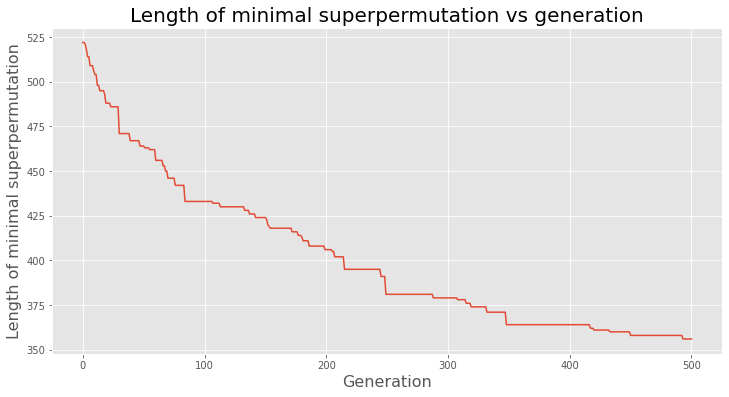

In [7]:
plt.figure(figsize = (12, 6))
plt.plot(range(ga.current_generation + 1), ga.best_scores_per_generation)
plt.xlabel("Generation", fontsize = 16)
plt.ylabel("Length of minimal superpermutation", fontsize = 16)
plt.title("Length of minimal superpermutation vs generation", fontsize = 20)
plt.show()